## 1. Sobel算子
### 1.1 原型
使用Sobel算子的函数原型如下：

`dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])`   
函数返回其处理结果。   
前四个参数的含义分别是：
- 第一个参数是需要处理的图像；
- 第二个参数是图像的深度，-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度；
- dx和dy表示求导的阶数，0表示这个方向上没有求导，一般为0、1、2。

其后是可选的参数：

- dst表示处理后的结果；
- ksize是Sobel算子的大小，必须为1、3、5、7。
- scale是缩放导数的比例常数，默认情况下没有伸缩系数；
- delta是一个可选的增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中；
- borderType是判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT。

### 1.2 使用

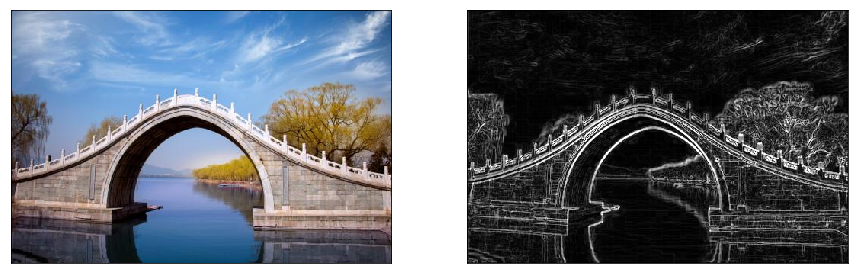

In [2]:
#coding=utf-8
import pylab
import cv2
import numpy as np
from matplotlib import pyplot as plt
pylab.rcParams['figure.figsize'] = (15.0, 8.0)


img = cv2.imread("./images/bridge.jpg")
# 变换通道
origin = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# 转换成灰度图
img = img[:,:,0]

x = cv2.Sobel(img,cv2.CV_16S,1,0)
y = cv2.Sobel(img,cv2.CV_16S,0,1)
 
absX = cv2.convertScaleAbs(x)
# 转回uint8
absY = cv2.convertScaleAbs(y)
 
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)

imgs = [origin,dst]

for index,img in enumerate(imgs):
    plt.subplot(1,len(imgs),index+1)
    plt.imshow(img,cmap="gray")
    plt.xticks([])
    plt.yticks([])

在Sobel函数的第二个参数这里使用了cv2.CV_16S。因为OpenCV文档中对Sobel算子的介绍中有这么一句：“in the case of 8-bit input images it will result in truncated derivatives”。即Sobel函数求完导数后会有负值，还有会大于255的值。而原图像是uint8，即8位无符号数，所以Sobel建立的图像位数不够，会有截断。因此要使用16位有符号的数据类型，即cv2.CV_16S。

在经过处理后，别忘了用convertScaleAbs()函数将其转回原来的uint8形式。否则将无法显示图像，而只是一副灰色的窗口。convertScaleAbs()的原型为：

`dst = cv2.convertScaleAbs(src[, dst[, alpha[, beta]]])`

其中可选参数alpha是伸缩系数，beta是加到结果上的一个值。结果返回uint8类型的图片。   
由于Sobel算子是在两个方向计算的，最后还需要用cv2.addWeighted(...)函数将其组合起来。其函数原型为：

`dst = cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])`

其中alpha是第一幅图片中元素的权重，beta是第二个的权重，gamma是加到最后结果上的一个值。